# ANLP Assignment: Sentiment Classification

In this assignment, you will be investigating NLP methods for distinguishing positive and negative reviews written about movies.

For assessment, you are expected to complete and submit this notebook file.  When answers require code, you may import and use library functions (unless explicitly told otherwise).  All of your own code should be included in the notebook rather than imported from elsewhere.  Written answers should also be included in the notebook.  You should insert as many extra cells as you want and change the type between code and markdown as appropriate.

In order to avoid misconduct, you should not talk about the assignment questions with your peers.  If you are not sure what a question is asking you to do or have any other questions, please ask me or one of the Teaching Assistants.

Marking guidelines are provided as a separate document.

The first few cells contain code to set-up the assignment and bring in some data.   In order to provide unique datasets for analysis by different students, you must enter your candidate number in the following cell.  Otherwise do not change the code in these cells.

In [53]:
candidateno=277284 #this MUST be updated to your candidate number so that you get a unique data sample

In [54]:
#do not change the code in this cell
#preliminary imports

#set up nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import movie_reviews

#for setting up training and testing data
import random

#useful other tools
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import zip_longest
from nltk.probability import FreqDist
from nltk.classify.api import ClassifierI


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [55]:
#do not change the code in this cell
def split_data(data, ratio=0.7): # when the second argument is not given, it defaults to 0.7
    """
    Given corpus generator and ratio:
     - partitions the corpus into training data and test data, where the proportion in train is ratio,

    :param data: A corpus generator.
    :param ratio: The proportion of training documents (default 0.7)
    :return: a pair (tuple) of lists where the first element of the
            pair is a list of the training data and the second is a list of the test data.
    """

    data = list(data)
    n = len(data)
    train_indices = random.sample(range(n), int(n * ratio))
    test_indices = list(set(range(n)) - set(train_indices))
    train = [data[i] for i in train_indices]
    test = [data[i] for i in test_indices]
    return (train, test)


def get_train_test_data():

    #get ids of positive and negative movie reviews
    pos_review_ids=movie_reviews.fileids('pos')
    neg_review_ids=movie_reviews.fileids('neg')

    #split positive and negative data into training and testing sets
    pos_train_ids, pos_test_ids = split_data(pos_review_ids)
    neg_train_ids, neg_test_ids = split_data(neg_review_ids)
    #add labels to the data and concatenate
    training = [(movie_reviews.words(f),'pos') for f in pos_train_ids]+[(movie_reviews.words(f),'neg') for f in neg_train_ids]
    testing = [(movie_reviews.words(f),'pos') for f in pos_test_ids]+[(movie_reviews.words(f),'neg') for f in neg_test_ids]

    return training, testing

When you have run the cell below, your unique training and testing samples will be stored in `training_data` and `testing_data`

In [56]:
#do not change the code in this cell
random.seed(candidateno)
training_data,testing_data=get_train_test_data()
print("The amount of training data is {}".format(len(training_data)))
print("The amount of testing data is {}".format(len(testing_data)))
print("The representation of a single data item is below")
print(training_data[0])

The amount of training data is 1400
The amount of testing data is 600
The representation of a single data item is below
(['with', 'the', 'exception', 'of', 'their', ...], 'pos')


1)  
a) **Generate** a list of 10 content words which are representative of the positive reviews in your training data.

b) **Generate** a list of 10 content words which are representative of the negative reviews in your training data.

c) **Explain** what you have done and why

[20\%]

In [57]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
import string
import math
stopWords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
def processData(dataset):
    datasetProcessed = []
    for sample in dataset:
        label = sample[1]
        processSample = sample[0]
        processSample = [lemmatizer.lemmatize(word, wordnet.VERB) for word in processSample]
        processSample = [lemmatizer.lemmatize(word) for word in processSample]
        processSample = [word for word in processSample if not word.lower() in stopWords]
        processSample = [word for word in processSample if word not in string.punctuation]
        datasetProcessed.append((processSample, label))
    return datasetProcessed

The function above processes the data step by step. It starts with the iteration of the dataset and obtains a review. Then it uses a lemmatizer object to find the lemma of words from the review depending on their meaning and context. Next, it eliminates stop words from the content and converts everything into lowercase. After that, it eliminates punctuation. When a review is processed, it is kept in a new data structure along with its label, and the same process starts for the next review. At the end of the function, upon the end of the for loop, the processed version of the dataset is returned.

In [59]:
trainingDataProcessed = processData(training_data)
testingDataProcessed = processData(testing_data)

In [60]:
posRevWords = []
for sample in trainingDataProcessed[:700]: posRevWords += sample[0]
negRevWords = []
for sample in trainingDataProcessed[700:]: negRevWords += sample[0]

The code block above collects every word from every positive review and keeps them all in a list of positive review words. Then, it executes the same process for negative reviews.

In [61]:
top10Pos = (FreqDist(posRevWords) - FreqDist(negRevWords)).most_common(10)
top10Pos = [sample[0] for sample in top10Pos]
top10Neg = (FreqDist(negRevWords) - FreqDist(posRevWords)).most_common(10)
top10Neg = [sample[0] for sample in top10Neg]

The code block above finds 10 positive and negative content words. To do so, it first finds the most frequent positive and negative review words and the number of repetitions of those words. To find the 10 positive content words, it subtracts the number of repetitions of each negative review word from each positive one accordingly. The higher the subtraction result is the more suitable the corresponding word to be a content word. Then, it executes the same process to find the 10 negative content words.

In [62]:
top10Pos

['film',
 'life',
 'also',
 'see',
 'story',
 'performance',
 'great',
 'one',
 'world',
 'well']

In [63]:
top10Neg

['movie',
 'bad',
 'plot',
 'bore',
 'worst',
 'get',
 'waste',
 'script',
 'minute',
 'try']

2)
a) **Use** the lists generated in Q1 to build a **word list classifier** which will classify reviews as being positive or negative.

b) **Explain** what you have done.

[12.5\%]


In [64]:
def reviewClassifier(dataset, posRevWords, negRevWords):
    predictions = []
    for sample in testingDataProcessed:
        posWordsCount = sum(1 for word in sample[0] if word in posRevWords)
        negWordsCount = sum(1 for word in sample[0] if word in negRevWords)
        if posWordsCount > negWordsCount: predictions.append("pos")
        else: predictions.append("neg")
    return predictions

The function above tags reviews as positive or negative based on created content words. To tag a review, it counts the number of repetitions of content words in the review and sums them all. This is done separately for positive and negative content words. If the number of total positive content word repetitions is more than the negative ones, it tags a review as positive, otherwise, it tags it as negative. After each tagging, it keeps the result in a list for further use.

In [65]:
predictions = reviewClassifier(testingDataProcessed, top10Pos, top10Neg)
predictions

['pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',


3)
a) **Calculate** the accuracy, precision, recall and F1 score of your classifier.

b) Is it reasonable to evaluate the classifier in terms of its accuracy?  **Explain** your answer and give a counter-example (a scenario where it would / would not be reasonable to evaluate the classifier in terms of its accuracy).

[20\%]

In [66]:
def modelEvaluation(labels, predictions):
    truePositive = 0
    trueNegative = 0
    falsePositive = 0
    falseNegative = 0
    for i in range(0,len(labels)):
        label = labels[i]
        prediction = predictions[i]
        if label == "pos" and prediction == "pos": truePositive+=1
        elif label == "neg" and prediction == "neg": trueNegative+=1
        elif label == "neg" and prediction == "pos": falsePositive+=1
        else: falseNegative+=1
    accuracy = (truePositive + trueNegative) / len(testingDataProcessed)
    precision = truePositive / (truePositive + falsePositive)
    recall = truePositive / (truePositive + falseNegative)
    return (accuracy, precision, recall)

The function above compares the tagging results with real labels to calculate the model's efficiency and find accuracy, precision, and recall. The calculation of accuracy, precision, and recall is done using the total number of true positive, true negative, false positive, and false negative outcomes. "True Positive" outcome means that the model correctly predicts the positive class. "True Negative" outcome means that the model correctly predicts the negative class. "False Positive" outcome means that the model incorrectly predicts the positive class. "False Negative" outcome means that the model incorrectly predicts the negative class.

In [67]:
def printEvaluation(results):
    print(f"Accuracy: {results[0]}")
    print(f"Precision: {results[1]}")
    print(f"Recall: {results[2]}")

In [68]:
labels = [sample[1] for sample in testingDataProcessed]
printEvaluation(modelEvaluation(labels, predictions))

Accuracy: 0.5983333333333334
Precision: 0.5648351648351648
Recall: 0.8566666666666667


It is not reasonable to evaluate the classifier solely in terms of its accuracy because of the Accuracy Paradox. For example, if you correctly predict 90 people as "no cancer" (True Negative) and incorrectly predict 10 people as "no cancer" (False Negative) from a group of 100 people, it gives you 90% accuracy. But when we calculate precision and recall, we get 0. If we only consider accuracy, we would think that the model works well, but it is deceptive. This prediction leads 10 people to probably die from cancer without getting any treatment. As a result, it is better to consider every type of measure.

4)
a)  **Construct** a Naive Bayes classifier (e.g., from NLTK).

b)  **Compare** the performance of your word list classifier with the Naive Bayes classifier.  **Discuss** your results.

[12.5\%]

In [69]:
trainingDataStructured = [(FreqDist(word), "pos" if label == "pos" else "neg" ) for word, label in trainingDataProcessed]# Use FreqDist to calculate the frequency distribution of word,label in normalzied_review
testingDataStructured = [(FreqDist(word), "pos" if label == "pos" else "neg" ) for word, label in testingDataProcessed] # Use FreqDist to calculate the frequency distribution of word,label in testing_data

The code block above changes the structure of datasets to be used for the Naive Bayes classifier.

In [70]:
from nltk.classify.api import ClassifierI

class NBClassifier(ClassifierI):

    def __init__(self):

        pass

    def _set_known_vocabulary(self,training_data):
        known=[]
        for doc,label in training_data:
            known+=list(doc.keys())
        self.known= set(known)

    def _set_priors(self,training_data):
        priors={}
        for (doc,label) in training_data:
            priors[label]=priors.get(label,0)+1
        total=sum(priors.values())
        for key,value in priors.items():
            priors[key]=value/total
        self.priors=priors

    def _set_cond_probs(self,training_data):
        conds={}
        for(doc,label) in training_data:
            classcond=conds.get(label,{})
            for word in doc.keys():
                classcond[word]=classcond.get(word,0)+1

            conds[label]=classcond

        for label, classcond in conds.items():
            for word in self.known:

                classcond[word]=classcond.get(word,0)+1
            conds[label]=classcond

        for label,dist in conds.items():
            total=sum(dist.values())
            conds[label]={key:value/total for (key,value) in dist.items()}

        self.conds=conds

    def train(self,training_data):
        self._set_known_vocabulary(training_data)
        self._set_priors(training_data)
        self._set_cond_probs(training_data)

    def classify(self,doc):
        doc_probs={key:math.log(value) for (key,value) in self.priors.items()}
        for word in doc.keys():
            if word in self.known:
                doc_probs={classlabel:sofar+math.log(self.conds[classlabel].get(word,0)) for (classlabel,sofar) in doc_probs.items()}

        highprob=max(doc_probs.values())
        classes=[c for c in doc_probs.keys() if doc_probs[c]==highprob]
        return random.choice(classes)




The class above and its functions are to be used to perform Naive Bayes classification.

In [71]:
myclassifier=NBClassifier()
myclassifier.train(trainingDataStructured)
predictions = myclassifier.classify_many(doc for (doc,label) in testingDataStructured)
predictions

['pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',
 'pos',
 'neg',
 'pos',
 'pos',
 'pos',
 'pos',
 'neg',


In [72]:
printEvaluation(modelEvaluation(labels, predictions))

Accuracy: 0.8183333333333334
Precision: 0.823728813559322
Recall: 0.81


The results from word list classifier:

Accuracy: 0.5983333333333334 | Precision: 0.5648351648351648 | Recall: 0.8566666666666667

The results from Naive Bayes classifier:

Accuracy: 0.8183333333333334 | Precision: 0.823728813559322 | Recall: 0.81

It is obvious that Naive Bayes classifier performs so much better than word list classifier.

5)
a) Design and **carry out an experiment** into the impact of the **length of the wordlists** on the wordlist classifier.  Make sure you **describe** design decisions in your experiment, include a **graph** of your results and **discuss** your conclusions.

b) Would you **recommend** a wordlist classifier or a Naive Bayes classifier for future work in this area?  **Justify** your answer.

[25\%]


In [73]:
top30Pos = (FreqDist(posRevWords) - FreqDist(negRevWords)).most_common(30)
top30Pos = [sample[0] for sample in top30Pos]
top30Neg = (FreqDist(negRevWords) - FreqDist(posRevWords)).most_common(30)
top30Neg = [sample[0] for sample in top30Neg]

In [74]:
top30Pos

['film',
 'life',
 'also',
 'see',
 'story',
 'performance',
 'great',
 'one',
 'world',
 'well',
 'character',
 'many',
 'love',
 'best',
 'war',
 'take',
 'year',
 'time',
 'way',
 'quite',
 'family',
 'end',
 'although',
 'find',
 'american',
 'good',
 'job',
 'alien',
 'however',
 'still']

In [75]:
top30Neg

['movie',
 'bad',
 'plot',
 'bore',
 'worst',
 'get',
 'waste',
 'script',
 'minute',
 'try',
 'suppose',
 'attempt',
 'stupid',
 'look',
 'even',
 'nothing',
 'big',
 'guy',
 'least',
 'could',
 'joke',
 'action',
 'funny',
 'kill',
 'unfortunately',
 'think',
 'harry',
 'reason',
 'tv',
 'godzilla']

In [76]:
indexRecords=[]
accuracyRecords=[]
precisionRecords=[]
recallRecords=[]
for i in range(1,30):
    indexRecords.append(i)
    (accuracy,precision,recall) = modelEvaluation(labels,reviewClassifier(testingDataProcessed, top30Pos[:i], top30Neg[:i]))
    accuracyRecords.append(accuracy)
    precisionRecords.append(precision)
    recallRecords.append(recall)

The above code block finds accuracy, precision, and recall for different word list classifiers which have different numbers of words ranging from 1 to 30, and it keeps a record of each word list classifier's measuring results.

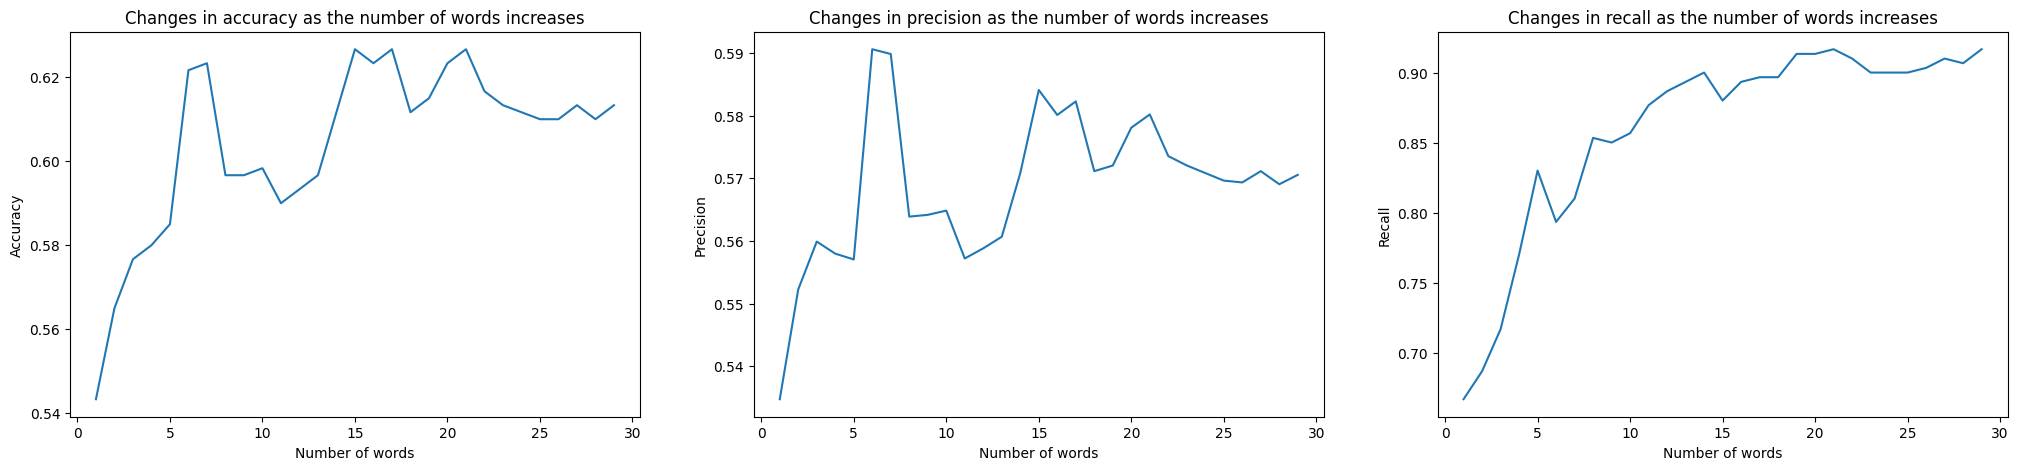

In [77]:
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1)
plt.plot(indexRecords,accuracyRecords)
plt.xlabel("Number of words")
plt.ylabel("Accuracy")
plt.title("Changes in accuracy as the number of words increases")
plt.subplot(1, 3, 2)
plt.plot(indexRecords,precisionRecords)
plt.xlabel("Number of words")
plt.ylabel("Precision")
plt.title("Changes in precision as the number of words increases")
plt.subplot(1, 3, 3)
plt.plot(indexRecords,recallRecords)
plt.xlabel("Number of words")
plt.ylabel("Recall")
plt.title("Changes in recall as the number of words increases")
plt.show()

It is clear that accuracy and precision graphs are very fluctuating compared to the recall graph and we can see that there is no significant improvement after 5 words.

We can say that word list classifier's results are very bad. On the other hand, Naive Bayes classifier's results are average but still not enough to be used in real-life situations.